# EDA & Data Transformations

In this notebook we explore the different ways we can transform the house prices skewed data as well as we explore the differente relationships between the explanatory variables and the SalePrice, our objective.

- Sale Price Transformations

    -Sale Price Histogram
    
    -Detecting and deleting outliers
    
    -Log Transformation
    
    -Box Cox Transformation
    
    
- EDA

## Sale Price - Transformations

Initial inspection of the data and EDA to choose the best variables for the analysis

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn import preprocessing

#Setting for pandas to show all columns
pd.set_option('display.max_columns', None)


In [220]:
#import and read the train data
train = pd.read_csv('./Data_Files/train_enriched.csv')

### Sale Price Data by Neighbourhood

In [221]:
#Make sure there is no missing values in the SalePrice Column
train['SalePrice'].describe()
#seems there is no missing data in SalePrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5,1,'Median Sale Price by Neighborhood')

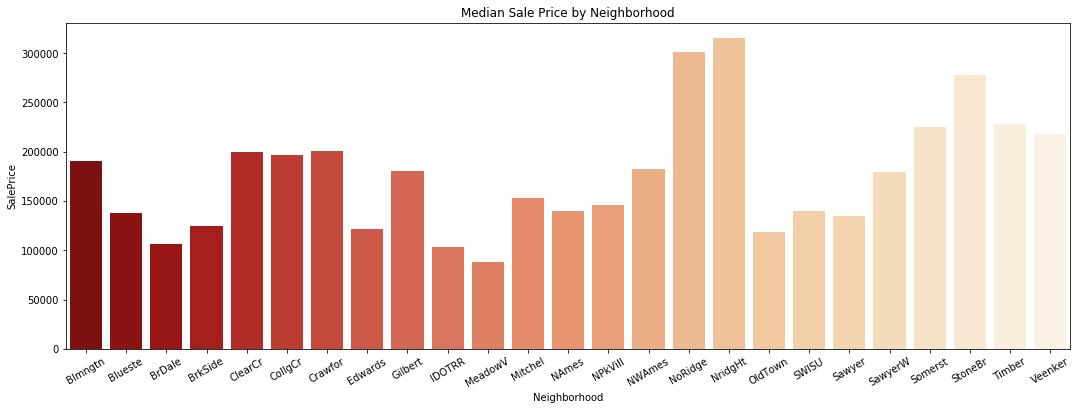

In [222]:
#Sale price by neighborhood
sale_neighborhood = train.groupby(['Neighborhood'])['SalePrice'].median().to_frame().reset_index()


plt.figure(figsize=(18,6))
ax = sns.barplot(x="Neighborhood", y="SalePrice", data=sale_neighborhood, palette="OrRd_r")
ax.set_xticklabels(sale_neighborhood.Neighborhood.unique(), rotation = 30)
ax.set_title('Median Sale Price by Neighborhood')

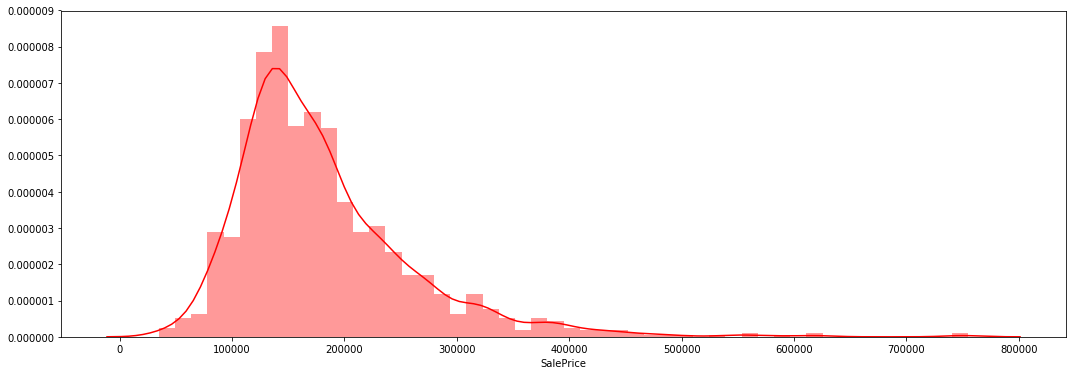

In [223]:
#Distribution of house prices data
plt.figure(figsize=(18,6))
sns.distplot(train['SalePrice'], bins=50, color="r")

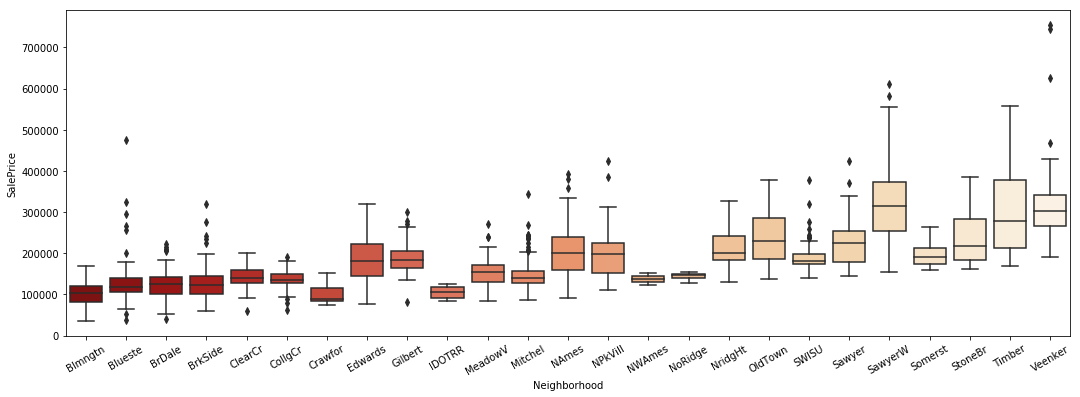

In [224]:
#Lets do a boxplot to detect outliers

plt.figure(figsize=(18,6))
ax = sns.boxplot(x='Neighborhood', y='SalePrice', data=train, palette="OrRd_r" )
ax.set_xticklabels(sale_neighborhood.Neighborhood.unique(), rotation = 30)
ax

In [225]:
#Lets get some stats about the skewness for the whole sample
train['SalePrice'].skew()

1.882875759768213

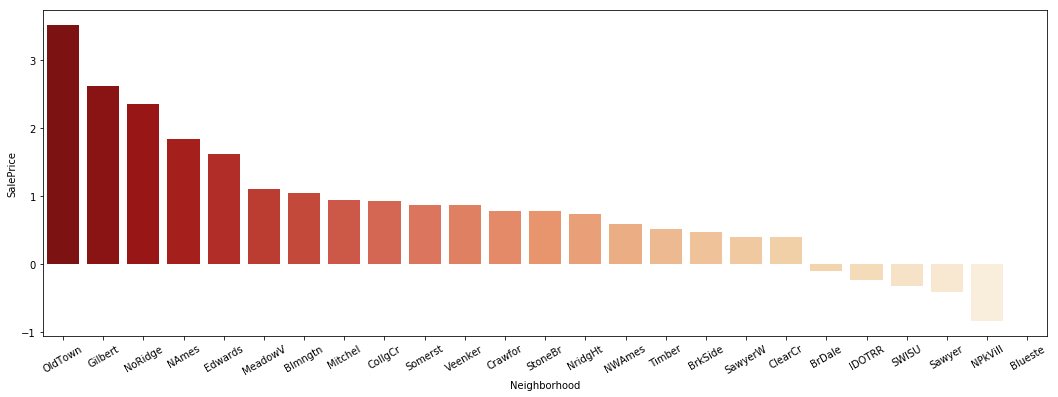

In [226]:
#Lets see the skew for each of the neighborhoods
skew_neioghborhood = train['SalePrice'].groupby(train['Neighborhood']).skew().sort_values(ascending=False).reset_index()
plt.figure(figsize=(18,6))
ax = sns.barplot(x='Neighborhood', y='SalePrice', data=skew_neioghborhood, palette="OrRd_r")
ax.set_xticklabels(skew_neioghborhood.Neighborhood.unique(), rotation = 30)
ax

## Normalize the data

### Method 1 - Delete Outliers

Lets delete some of the outliers we saw initially and see how this values change

In [227]:
#Remove Outliers with more than 3 std

sale_price = train[['SalePrice']]

#Delete outliers for 3 sd deviations
sale_price['SalePrice'] = sale_price.loc[sale_price.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
pd.DataFrame(sale_price)

#How many outliers have we deleted?
count_outliers = (train['SalePrice'].count() - sale_price.count())
ratio_outliers = (count_outliers / train['SalePrice'].count())*100
print('Outliers deleted: %.f' % count_outliers)
print('Ratio of outliers: %.2f' % ratio_outliers)

#Max price
max_price = sale_price['SalePrice'].max()
print('Maximum Price: %.0f' % max_price)

#Skewness is greatly reduced
print('New Skewness: %.1f' % sale_price.skew())

Outliers deleted: 22
Ratio of outliers: 1.51
Maximum Price: 415298
New Skewness: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [228]:
#Lets save this data for visualizing it
sale_price.to_csv('./Data_for_BI/sale_outliers.csv')

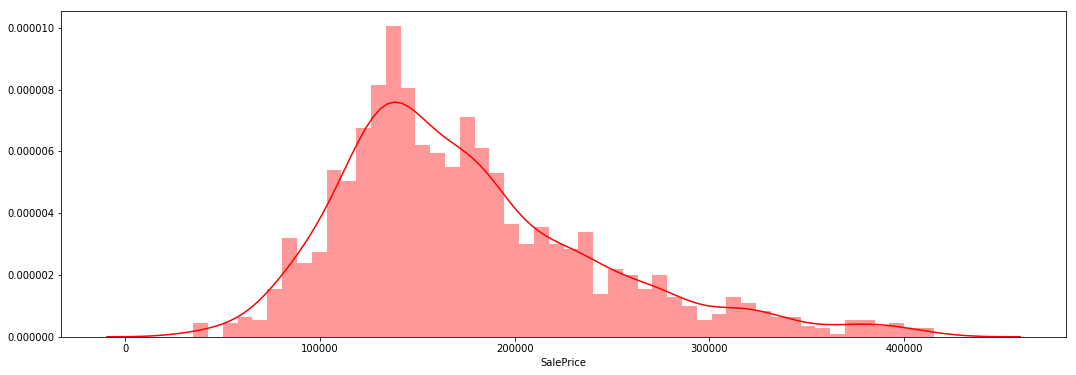

In [229]:
#lets visualize this new distribution

plt.figure(figsize=(18,6))
sns.distplot(sale_price['SalePrice'].dropna(), bins=50, color='r')

### Method 2 - Log Transformation

Since data is right skewed we will create a new duplicated Sale_Price column and apply a log transformation

In [230]:
train['logSalePrice'] = np.log1p(train['SalePrice'])
train['logSalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: logSalePrice, dtype: float64

Skew: 0.12


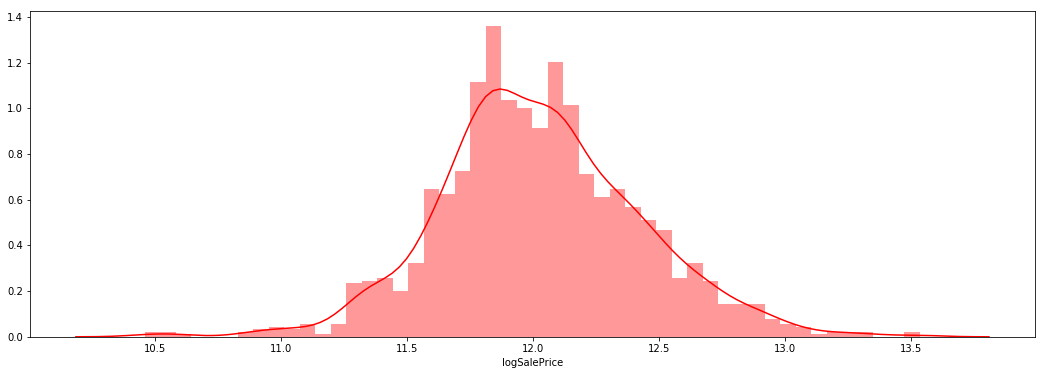

In [231]:
#Let's check teh results
print('Skew: %.2f' % train['logSalePrice'].skew())

#Histogram

plt.figure(figsize=(18,6))
sns.distplot(train['logSalePrice'], bins=50, color='r')


### Method 3 - Box Cox Transformation

We will be using the SciPy Packacge for that purpose

In [232]:
# Lets apply teh Box Cox transformation to our Sales Price and put it back into the DataFrame
array_price = np.asarray(train[['SalePrice']].values)

# transform values and store as "dft"
price_boxcox = stats.boxcox(array_price)[0]
train['BoxCoxSalePrice'] = price_boxcox 

print(train['BoxCoxSalePrice'].skew())

-0.00865297992366495


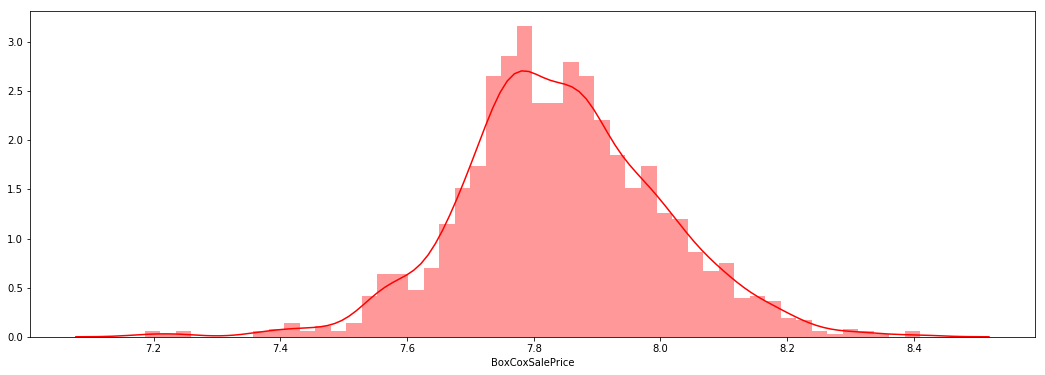

In [233]:
#Histogram
plt.figure(figsize=(18,6))
sns.distplot(train['BoxCoxSalePrice'], bins=50, color='r')

In [234]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GIS Cluster (K-means),logSalePrice,BoxCoxSalePrice
0,0,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900,2,10.460271,7.185700
1,1,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311,2,10.471978,7.190934
2,2,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000,2,10.596660,7.246383
3,3,1326,30,RM,40.0,3636,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,4,1922,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,796,796,GasA,Fa,N,SBrkr,796,0,0,796,0,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,100,0,0,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,55000,2,10.915107,7.385612
4,4,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,2Story,4,5,1930,1950,Hip,CompShg,VinylSd,Wd Shng,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,SBrkr,372,720,0,1092,0,0,2,0,3,2,Fa,7,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000,2,10.915107,7.385612


In [264]:
#export data for graphics, standarazing the data for being able to comapre
train_standarized = train[['SalePrice','BoxCoxSalePrice','logSalePrice']]
scaler =preprocessing.StandardScaler().fit(train_standarized)
train_standarized = scaler.transform(train_standarized)
train_standarized = pd.DataFrame(train_standarized, columns=['SalePrice','BoxCoxSalePrice','logSalePrice'])

train_standarized.to_csv('./Data_for_BI/sale_price_transformations.csv')

**Combination charts**

In [ ]:
#Creating a figure wiht the different transformations
plt.figure(figsize=(14,6))
ax = sns.distplot(train_standarized['SalePrice'], label='Sale Price',bins=50, color="black", hist=False)
ax = sns.distplot(train_standarized['BoxCoxSalePrice'],label='Box Cox Sale Price', bins=50, color='r', hist=False)
ax = sns.distplot(train_standarized['logSalePrice'],label='Log1p of Sale Price', bins=50, color='b', hist=False)
plt.legend()
plt.xlim(-4,4)
plt.xlabel('Sale Price')

#Saving final plot for presentation
skew_figure = ax.get_figure()    
skew_figure.savefig('sale_price_transformations.png', dpi=600)

# Correlations

Correlation between Sale Price and all variables

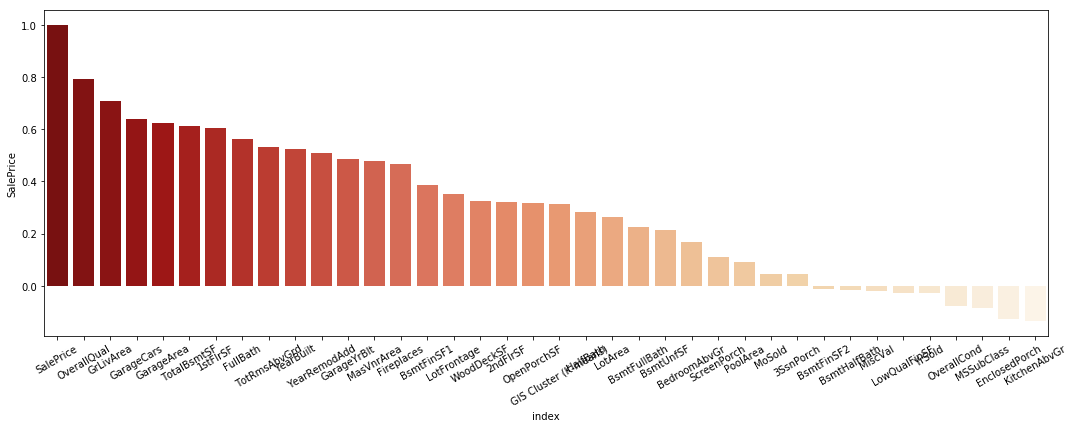

In [273]:
plt.figure(figsize=(18,6))
correlation_barplot = pd.DataFrame(corr_matrix['SalePrice'].sort_values(ascending=False).reset_index())
ax = sns.barplot(x='index', y='SalePrice', data=correlation_barplot,   palette="OrRd_r")
ax.set_xticklabels(correlation_barplot['index'].unique(), rotation = 30)
ax

#Saving final plot for presentation
corr_figure = ax.get_figure()    
corr_figure.savefig('sale_price_correlations.png', dpi=600)

In [278]:
#we use the corr function for only the numneric features
train_corr = pd.DataFrame(train.drop(['Id', 'Unnamed: 0', 'logSalePrice', 'BoxCoxSalePrice'], axis=1))
train_numeric = train_corr._get_numeric_data() #keep only numeric features
corr_matrix = train_numeric.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)
#Save matrix for viz
corr_matrix.to_csv('./Data_for_BI/correlation_matrix.csv')


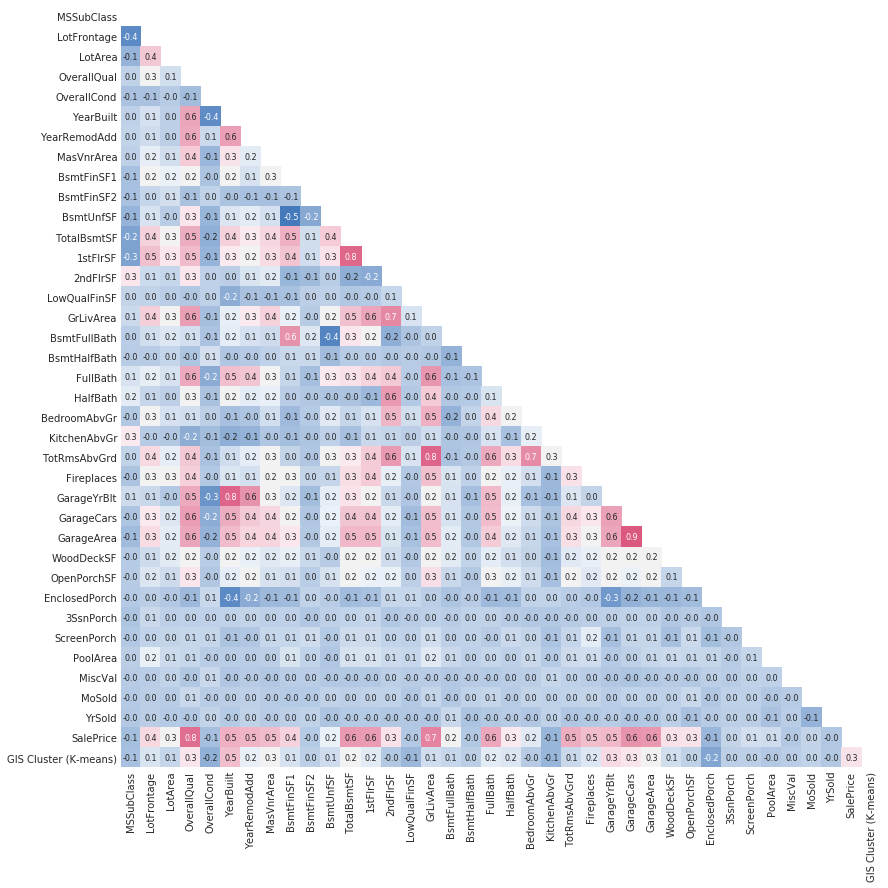

In [293]:
plt.figure(figsize=(18,14))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(250, 0, as_cmap=True)
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix,mask=mask, cmap=cmap, annot=True, annot_kws={"size": 8}, cbar=False, square=True,  fmt='.1f')

#Saving final plot for presentation
corr_matrix = ax.get_figure()    
corr_matrix.savefig('corr_matrix.png', dpi=600)

**Inspect some of the main correlatrions**

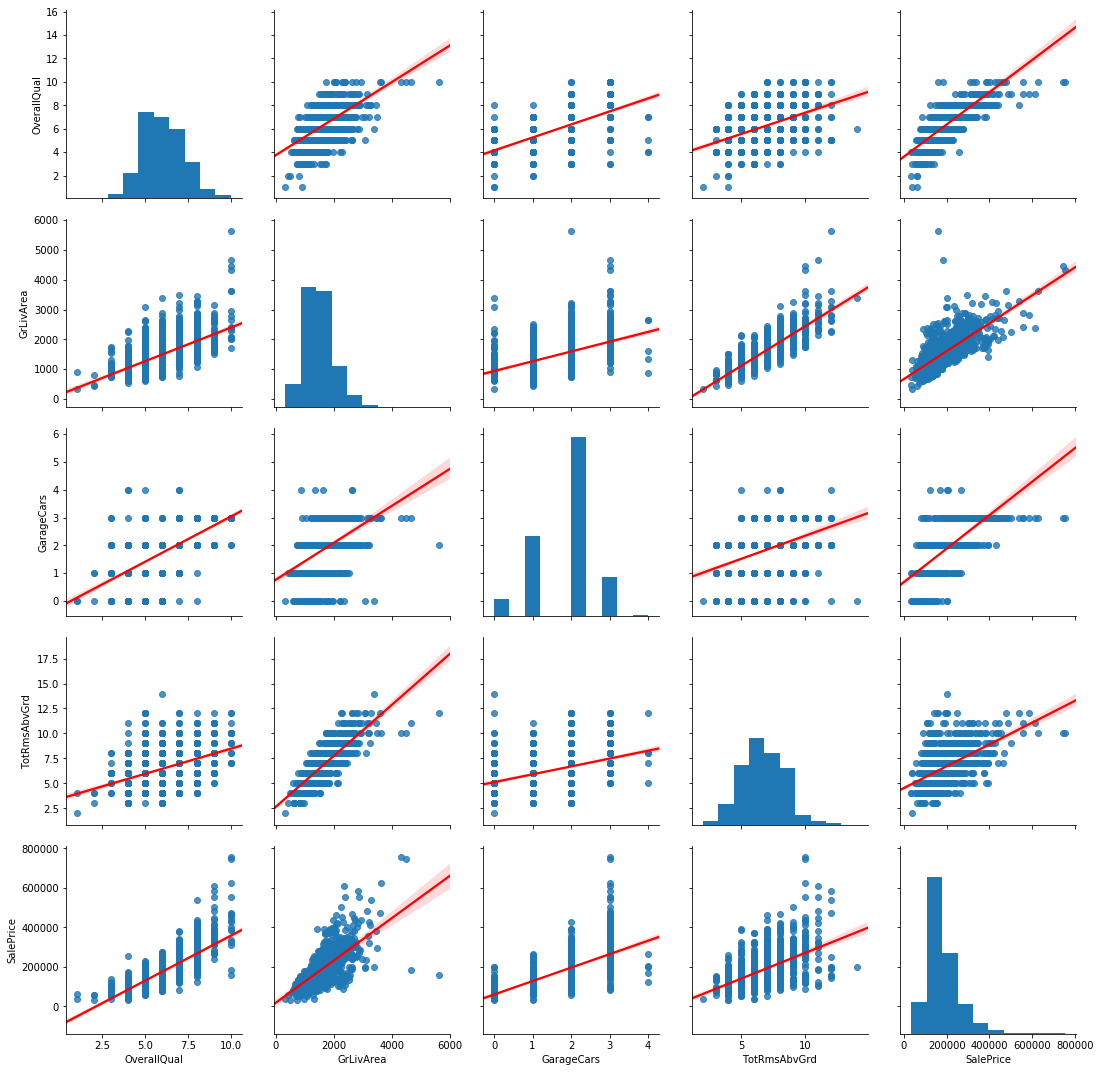

In [308]:
#We will just expore some of the columns (after the data has been treated), to see if we identify any pattern
plt.figure(figsize=(18,14))
pairplot_data = train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotRmsAbvGrd', 'SalePrice']]

#And we build a pairplot
ax2 =sns.pairplot(pairplot_data, kind="reg", size=3,plot_kws={'line_kws':{'color':'red'}})
ax2